In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


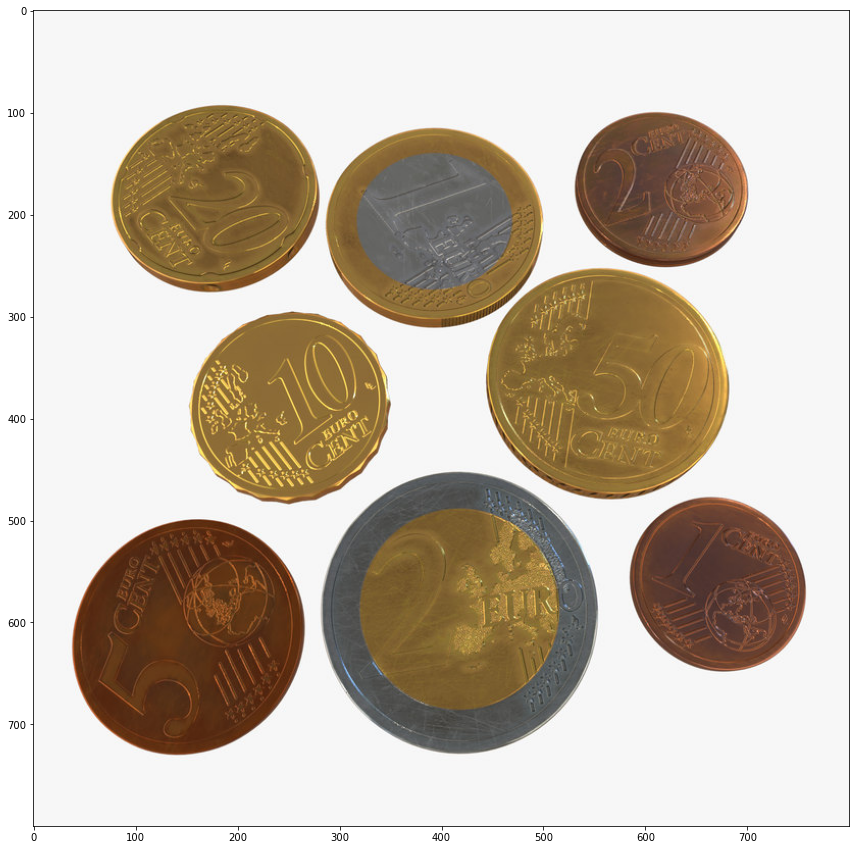

In [12]:
coins = cv2.imread('imgs/coins5.jpg')
rgb_coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
gray_coins = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,15))
plt.imshow(rgb_coins)

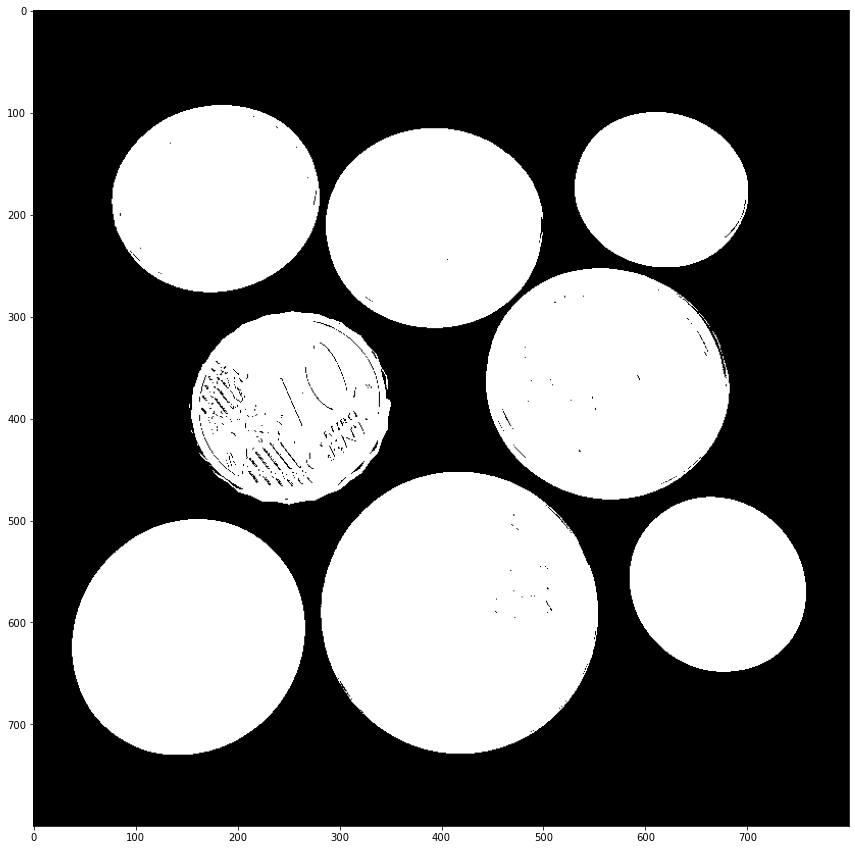

In [16]:
retval, threshold = cv2.threshold(gray_coins, 200, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(15,15))
plt.imshow(threshold, cmap='gray')

In [34]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [35]:
len(contours)

19

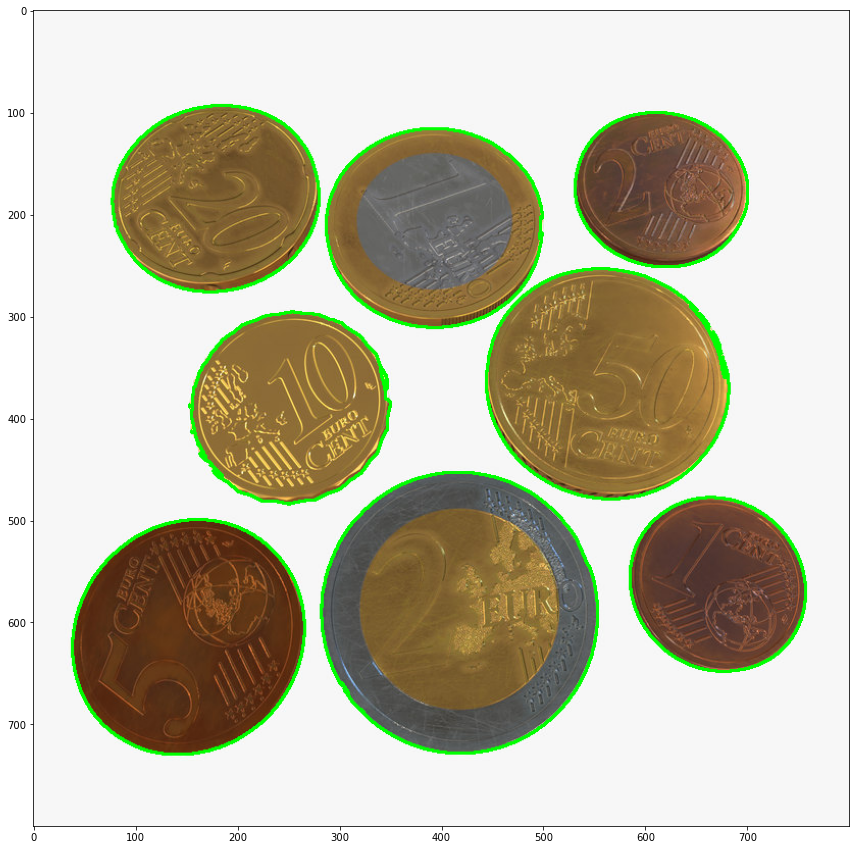

In [36]:
copy = rgb_coins.copy()
cv2.drawContours(copy, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(copy)

In [37]:
#sort
sorted_contours = sorted(contours, key = cv2.contourArea, reverse=True)

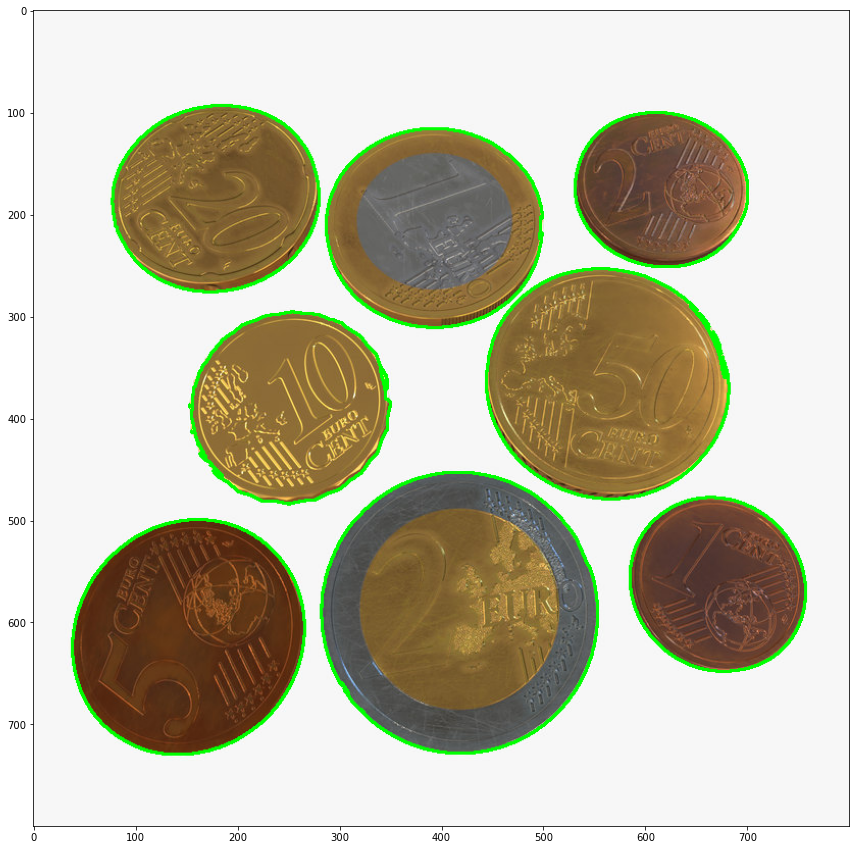

In [39]:
copy = rgb_coins.copy()
cv2.drawContours(copy,sorted_contours, -1, (0, 255, 0), 2)
#cv2.drawContours(copy,sorted_contours[0:8], -1, (0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(copy)

In [41]:
# Orientation
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [42]:
left_to_right_contours, bb = sort_contours(sorted_contours[0:9])
#left_to_right_contours, bb = sort_contours(sorted_contours[0:9], 'right-to-left')

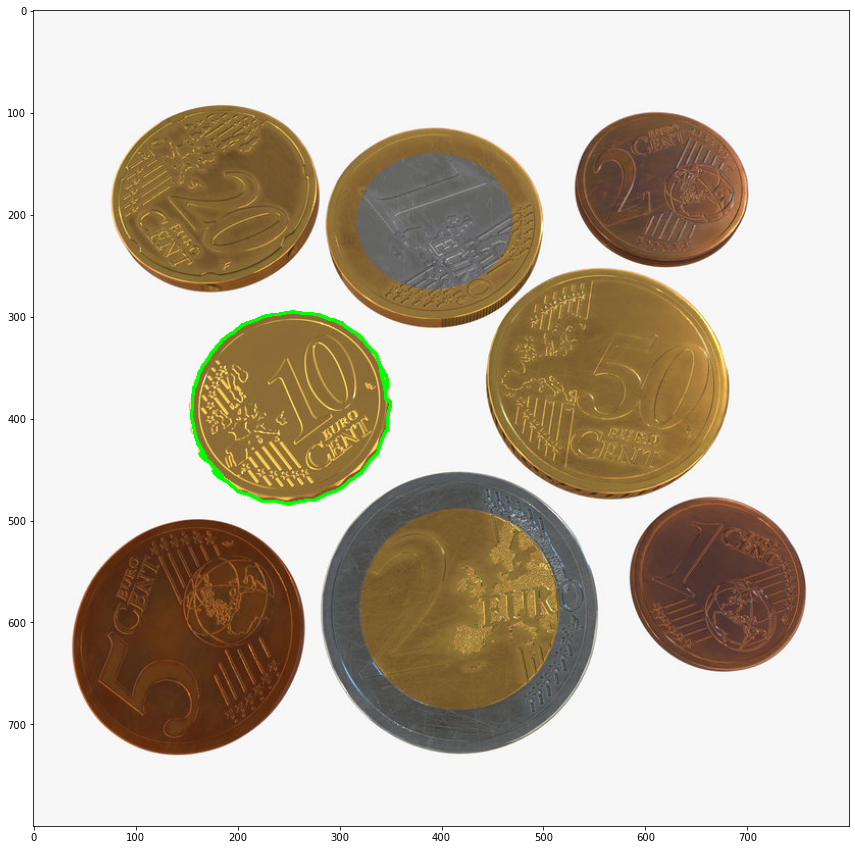

In [43]:
copy = rgb_coins.copy()
cv2.drawContours(copy, left_to_right_contours, 2, (0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(copy)

In [45]:
clean_contours = sorted_contours[0:9]

In [46]:
# Boundary rectangle
x, y, w, h = cv2.boundingRect(clean_contours[0])


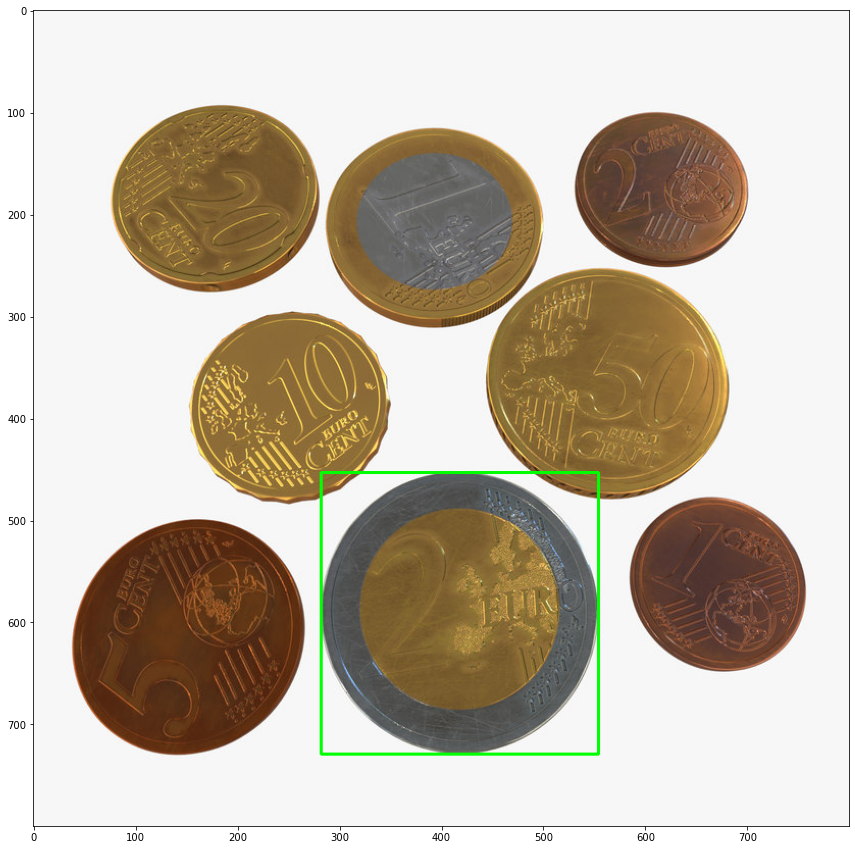

In [50]:
copy = rgb_coins.copy()
cv2.rectangle(copy, (x,y), (x+w, y+h),(0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(copy)

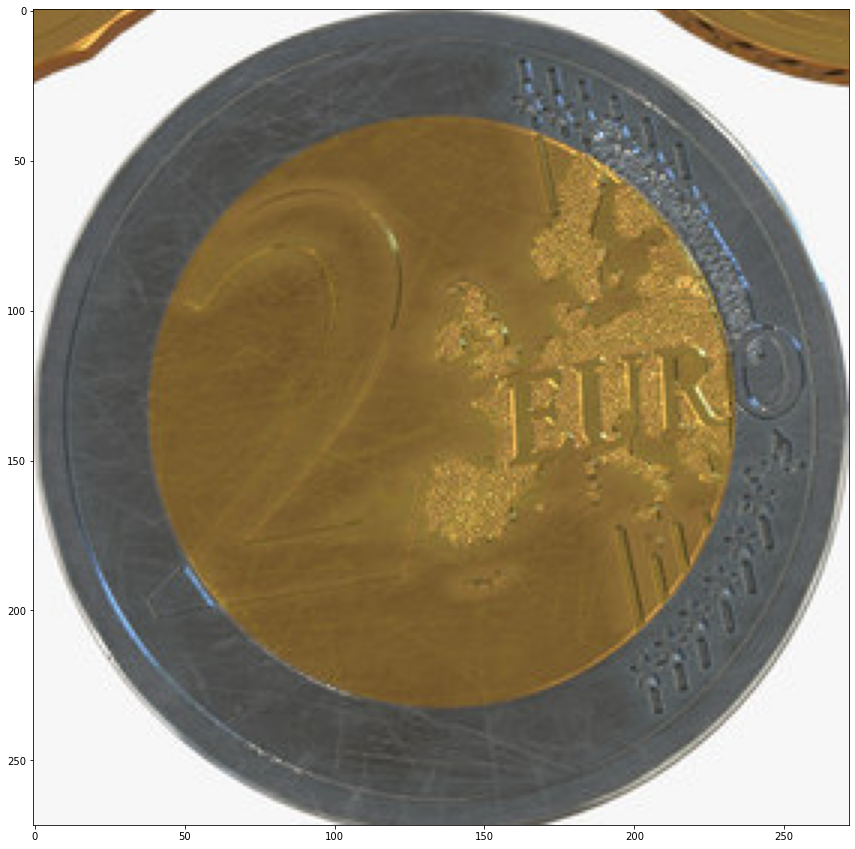

In [53]:
two_euro_coin = rgb_coins[y:y+w, x:x+w]
plt.figure(figsize=(15,15))
plt.imshow(two_euro_coin)

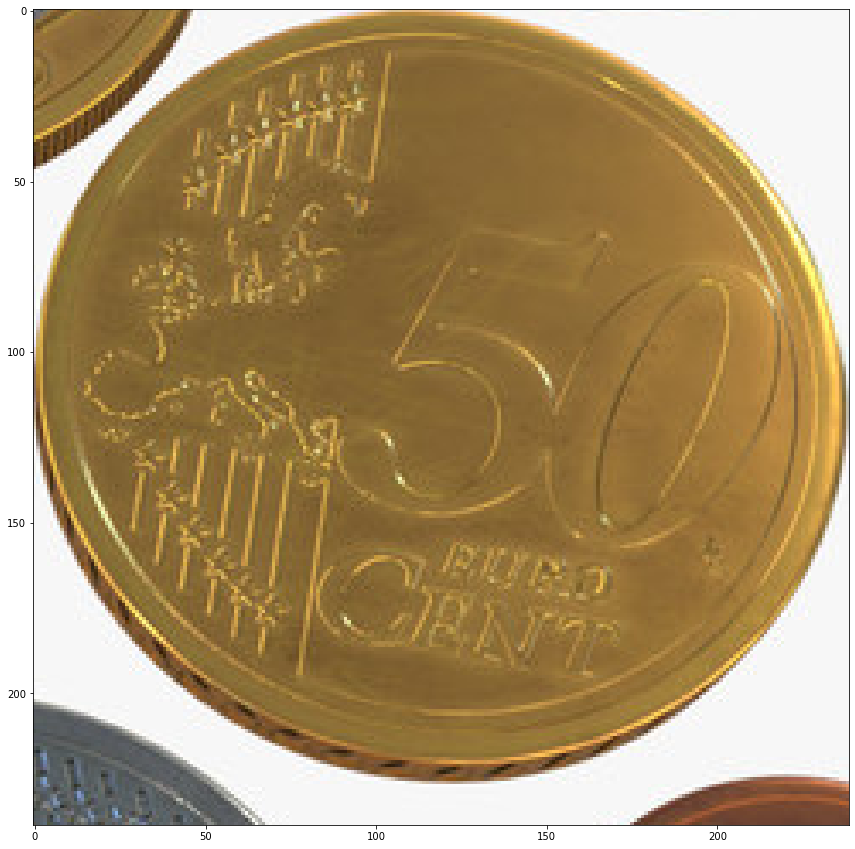

In [55]:
x, y, w, h = cv2.boundingRect(clean_contours[1])
fifty_cents_coin = rgb_coins[y:y+w, x:x+w]
plt.figure(figsize=(15,15))
plt.imshow(fifty_cents_coin)

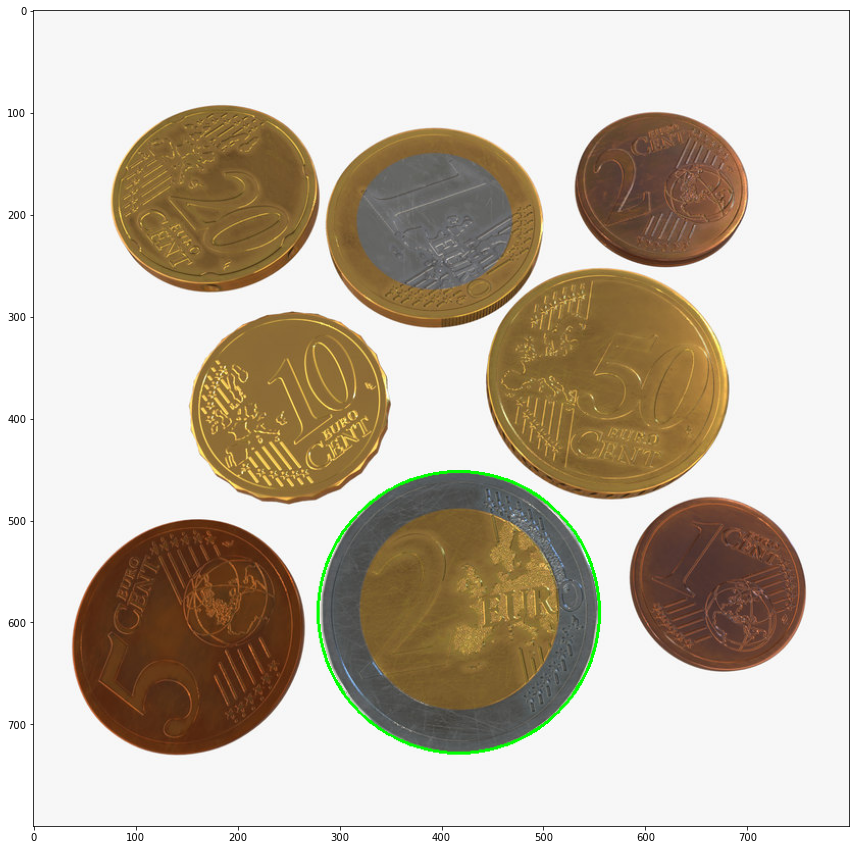

In [57]:
# MinEnclosingCircle
(x,y), radius = cv2.minEnclosingCircle(clean_contours[0])
x = int(x)
y = int(y)
radius = int(radius)

copy = rgb_coins.copy()
cv2.circle(copy, (x,y), radius,(0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(copy)

In [252]:
car = cv2.imread('img/car1.jpg')
rgb_car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
gray_car = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(gray_car, 220, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [253]:
len(contours)

6

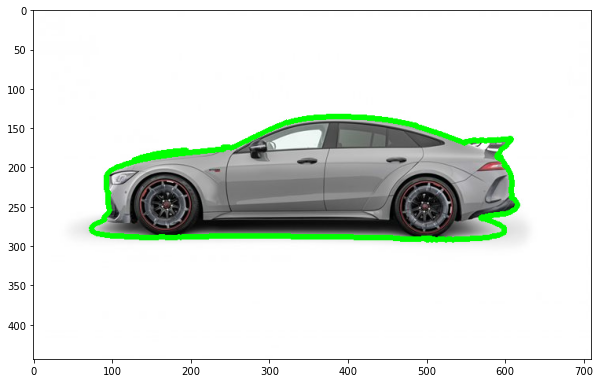

In [254]:
copy = rgb_car.copy()
cv2.drawContours(copy, contours, -1, (0, 255, 0), 5)
plt.figure(figsize=(10,10))
plt.imshow(copy)

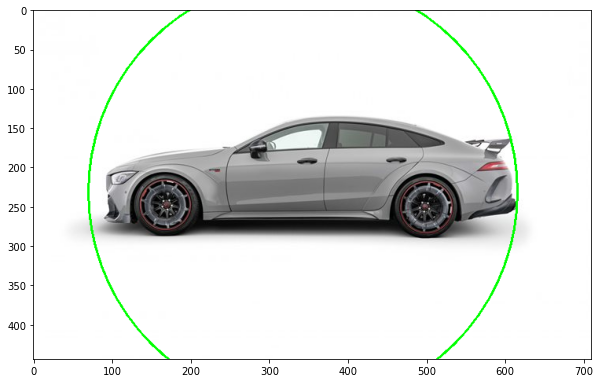

In [255]:
(x,y), radius = cv2.minEnclosingCircle(contours[5])
x = int(x)
y = int(y)
radius = int(radius)
copy = rgb_car.copy()
cv2.circle(copy, (x,y), radius,(0, 255, 0), 2)
plt.figure(figsize=(10,10))
plt.imshow(copy)

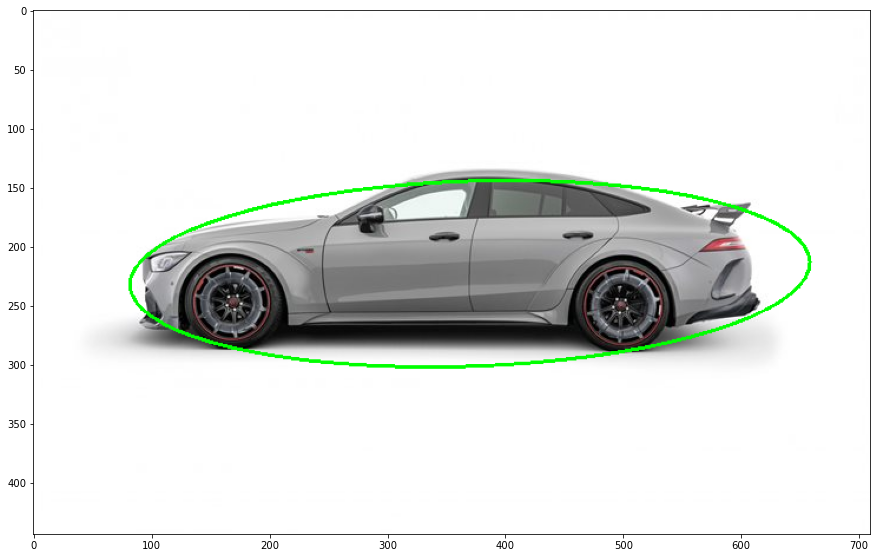

In [231]:
# Ellipse
ellipse = cv2.fitEllipse(contours[5])
copy = rgb_car.copy()
cv2.ellipse(copy, ellipse,(0, 255, 0), 2)
plt.figure(figsize=(15,15))
plt.imshow(copy)

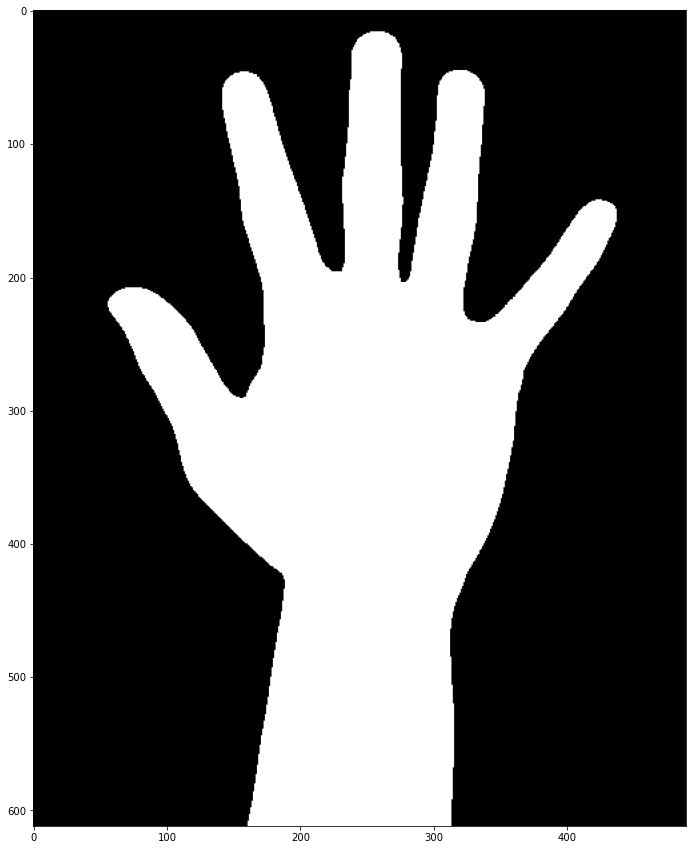

In [256]:
# Convex Hull
hand = cv2.imread('imgs/hand.jpg')
rgb_hand = cv2.cvtColor(hand, cv2.COLOR_BGR2RGB)
gray_hand = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(gray_hand, 220, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(15,15))
plt.imshow(threshold, cmap= 'gray')

In [259]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

1

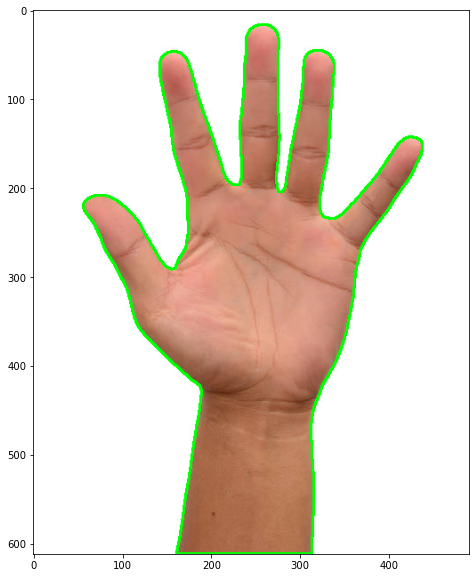

In [264]:
copy = rgb_hand.copy()
cv2.drawContours(copy, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(10,10))
plt.imshow(copy)

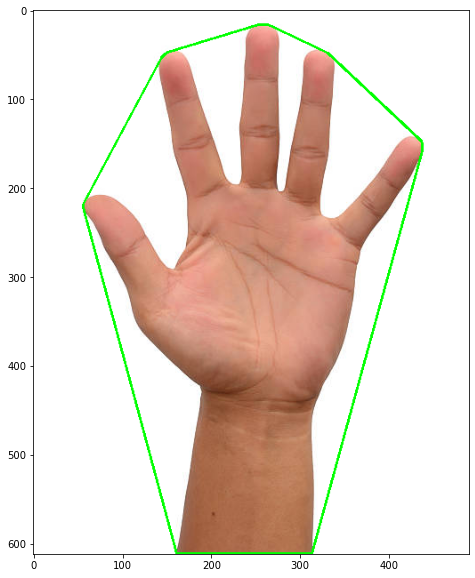

In [267]:
hull = cv2.convexHull(contours[0])
copy = rgb_hand.copy()
cv2.drawContours(copy, [hull], 0, (0, 255, 0), 2)
plt.figure(figsize=(10,10))
plt.imshow(copy)